In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import special
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import joblib
from sklearn.decomposition import PCA

In [2]:
train = pd.read_csv('../data/raw_data/train.csv')
test = pd.read_csv('../data/raw_data/test.csv')

In [3]:
num_col=[] # to do: missing values, outlier, skewness(log1p, Box-cox)
multi_cat_col=[] # to do: Onehot
bin_cat_col=[] # to do: Label-encoding
ord_col=[]

def train_test_column_same():
    train_col=train.columns.to_list()
    test_col=test.columns.to_list()
    train_col.remove('SalePrice')
    print(train_col==test_col) 

def col_overview():
    print("num_col: ")
    print(num_col)
    print("multi_cat_col")
    print(multi_cat_col)
    print("ord_col")
    print(ord_col)
    print("bin_cat_col")
    print(bin_cat_col)
    
def merge_rare(dataframe, col, percentage):
    series = pd.value_counts(dataframe[col])
    mask = (series / series.sum() * 100).lt(percentage)  # 10 is the percentage
    dataframe = dataframe.assign(temp=np.where(dataframe[col].isin(
    series[mask].index), 'Other', dataframe[col]))
    dataframe[col] = dataframe.temp
    dataframe.drop('temp', axis=1, inplace=True)
    print(dataframe[col].value_counts())
    
def mean_encoder(col):
    means = pd.read_csv('../data/raw_data/train.csv').groupby(col).SalePrice.mean()
    train[col+'_mean_target'] = train[col].map(means)
    test[col+'_mean_target'] = test[col].map(means)
    train.drop(col,axis=1,inplace=True)
    test.drop(col,axis=1,inplace=True)

In [4]:
# SalePrice
train['SalePrice'] = np.log1p(train['SalePrice'])

In [5]:
# Id
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [6]:
# MSSubClass 
# impute new category in test set by mode in training set
test.loc[test.MSSubClass==150,'MSSubClass'] = 20
mean_encoder('MSSubClass')
num_col.append('MSSubClass_mean_target')

In [7]:
# MSZoning
multi_cat_col.append('MSZoning')

In [8]:
# LotFrontage
num_col.append('LotFrontage')

In [9]:
# LotArea
num_col.append('LotArea')

In [10]:
# Street
bin_cat_col.append('Street')

In [11]:
# Alley
train.Alley.fillna('No alley access',inplace=True)
test.Alley.fillna('No alley access',inplace=True)
multi_cat_col.append('Alley')

In [12]:
# LotShape
multi_cat_col.append('LotShape')

In [13]:
# LandContour
multi_cat_col.append('LandContour')

In [14]:
# Utilities
train.drop('Utilities',axis=1,inplace=True)
test.drop('Utilities',axis=1,inplace=True)

In [15]:
# LotConfig
multi_cat_col.append('LotConfig')

In [16]:
# LandSlope
train.LandSlope=train.LandSlope.map({'Gtl':2,'Mod':1,'Sev':0})
test.LandSlope=test.LandSlope.map({'Gtl':2,'Mod':1,'Sev':0})
ord_col.append('LandSlope')

In [17]:
# Neighborhood
mean_encoder('Neighborhood')
num_col.append('Neighborhood_mean_target')

In [18]:
# Condition1
mean_encoder('Condition1')
num_col.append('Condition1_mean_target')

In [19]:
# Condition2
mean_encoder('Condition2')
num_col.append('Condition2_mean_target')

In [20]:
# BldgType
multi_cat_col.append('BldgType')

In [21]:
# HouseStyle
merge_rare(train, 'HouseStyle', 10)
merge_rare(test, 'HouseStyle', 10)
multi_cat_col.append('HouseStyle')

1Story    726
2Story    445
1.5Fin    154
Other     135
Name: HouseStyle, dtype: int64
1Story    745
2Story    427
1.5Fin    160
Other     127
Name: HouseStyle, dtype: int64


In [22]:
# OverallQual
# already numerial, ordinary
ord_col.append('OverallQual')

In [23]:
# OverallCond
# already numerial, ordinary
ord_col.append('OverallCond')

In [24]:
# YearBuilt
train['AgeBuilt'] = 2010 - train['YearBuilt']
test['AgeBuilt'] = 2010 - test['YearBuilt']
num_col.append('AgeBuilt')

In [25]:
# YearRemodAdd
train['AgeRemodAdd'] = 2010 - train['YearRemodAdd']
test['AgeRemodAdd'] = 2010 - test['YearRemodAdd']
train.drop('YearRemodAdd',axis=1,inplace=True)
test.drop('YearRemodAdd',axis=1,inplace=True)
num_col.append('AgeRemodAdd')

In [26]:
# RoofStyle
multi_cat_col.append('RoofStyle')

In [27]:
# RoofMatl
mean_encoder('RoofMatl')
num_col.append('RoofMatl_mean_target')

In [28]:
# Exterior1st
merge_rare(train, 'Exterior1st', 10)
merge_rare(test, 'Exterior1st', 10)
multi_cat_col.append('Exterior1st')

VinylSd    515
Other      297
HdBoard    222
MetalSd    220
Wd Sdng    206
Name: Exterior1st, dtype: int64
VinylSd    510
Other      293
MetalSd    230
HdBoard    220
Wd Sdng    205
Name: Exterior1st, dtype: int64


In [29]:
# Exterior2nd
mean_encoder('Exterior2nd')
num_col.append('Exterior2nd_mean_target')

In [30]:
# MasVnrType
multi_cat_col.append('MasVnrType')

In [31]:
# MasVnrArea
num_col.append('MasVnrArea')

In [32]:
# ExterQual
train.ExterQual=train.ExterQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test.ExterQual=test.ExterQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
ord_col.append('ExterQual')

In [33]:
# ExterCond
train.ExterCond=train.ExterCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test.ExterCond=test.ExterCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
ord_col.append('ExterCond')

In [34]:
# Foundation
multi_cat_col.append('Foundation')

In [35]:
# BsmtQual
train.BsmtQual.fillna('No basement',inplace=True) 
test.BsmtQual.fillna('No basement',inplace=True) 
train.BsmtQual=train.BsmtQual.map({'No basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test.BsmtQual=test.BsmtQual.map({'No basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
ord_col.append('BsmtQual')

In [36]:
# BsmtCond
train.BsmtCond.fillna('No basement',inplace=True) 
test.BsmtCond.fillna('No basement',inplace=True) 
train.BsmtCond=train.BsmtCond.map({'No basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test.BsmtCond=test.BsmtCond.map({'No basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
ord_col.append('BsmtCond')

In [37]:
# BsmtExposure
train.BsmtExposure.fillna('No basement',inplace=True) 
test.BsmtExposure.fillna('No basement',inplace=True) 
train.BsmtExposure=train.BsmtExposure.map({'No basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
test.BsmtExposure=test.BsmtExposure.map({'No basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
ord_col.append('BsmtExposure')

In [38]:
# BsmtFinType1
train.BsmtFinType1.fillna('No basement', inplace=True)
test.BsmtFinType1.fillna('No basement', inplace=True)
train.BsmtFinType1 = train.BsmtFinType1.map({'No basement':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test.BsmtFinType1 = test.BsmtFinType1.map({'No basement':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
ord_col.append('BsmtFinType1')

In [39]:
# BsmtFinType2
train.BsmtFinType2.fillna('No basement', inplace=True)
test.BsmtFinType2.fillna('No basement', inplace=True)
train.BsmtFinType2 = train.BsmtFinType2.map({'No basement':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test.BsmtFinType2 = test.BsmtFinType2.map({'No basement':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
ord_col.append('BsmtFinType2')

In [40]:
# BsmtFinSF1
num_col.append('BsmtFinSF1')

In [41]:
# BsmtFinSF2
num_col.append('BsmtFinSF2')

In [42]:
# BsmtUnfSF
num_col.append('BsmtUnfSF')

In [43]:
# Heating
multi_cat_col.append('Heating')

In [44]:
# HeatingQC
train.HeatingQC=train.HeatingQC.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test.HeatingQC=test.HeatingQC.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
ord_col.append('HeatingQC')

In [45]:
# CentralAir
bin_cat_col.append('CentralAir')

In [46]:
# Electrical
mode = train['Electrical'].value_counts().index[0]
train.loc[train.Electrical == 'Mix','Electrical'] = mode
test.loc[test.Electrical == 'Mix','Electrical'] = mode
train['Electrical'].fillna(mode, inplace=True)
test['Electrical'].fillna(mode, inplace=True)
multi_cat_col.append('Electrical')

In [47]:
# 1stFlrSF + 2ndFlrSF = #GrLivArea
train.drop('1stFlrSF',axis=1,inplace=True)
test.drop('1stFlrSF',axis=1,inplace=True)
train.drop('2ndFlrSF',axis=1,inplace=True)
test.drop('2ndFlrSF',axis=1,inplace=True)
num_col.append('GrLivArea')

In [48]:
# LowQualFinSF
train['LowQualFinSF']=['=0' if x == 0 else '>0' for x in train['LowQualFinSF']]
test['LowQualFinSF']=['=0' if x == 0 else '>0' for x in test['LowQualFinSF']]
bin_cat_col.append('LowQualFinSF')

In [49]:
# BsmtFullBath #BsmtHalfBath #FullBath #HalfBath #merge

train['Bath'] = train.apply(lambda x: x['BsmtFullBath'] + 0.5 * x['BsmtHalfBath']+x['FullBath'] + 0.5 * x['HalfBath'], axis=1)
test['Bath'] = test.apply(lambda x: x['BsmtFullBath'] + 0.5 * x['BsmtHalfBath']+x['FullBath'] + 0.5 * x['HalfBath'], axis=1)

train.drop('BsmtFullBath',axis=1,inplace=True)
test.drop('BsmtFullBath',axis=1,inplace=True)
train.drop('BsmtHalfBath',axis=1,inplace=True)
test.drop('BsmtHalfBath',axis=1,inplace=True)
train.drop('FullBath',axis=1,inplace=True)
test.drop('FullBath',axis=1,inplace=True)
train.drop('HalfBath',axis=1,inplace=True)
test.drop('HalfBath',axis=1,inplace=True)

num_col.append('Bath')

In [50]:
# KitchenAbvGr #BedroomAbvGr are related to #TotRmsAbvGrd
train.drop('KitchenAbvGr', axis=1, inplace=True)
test.drop('KitchenAbvGr', axis=1, inplace=True)
train.drop('BedroomAbvGr', axis=1, inplace=True)
test.drop('BedroomAbvGr', axis=1, inplace=True)
num_col.append('TotRmsAbvGrd')

In [51]:
# KitchenQual
train['KitchenQual'].fillna('Po',inplace=True)
test['KitchenQual'].fillna('Po',inplace=True)
train.KitchenQual=train.KitchenQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test.KitchenQual=test.KitchenQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
ord_col.append('KitchenQual')

In [52]:
# Functional
mode = train['Functional'].value_counts().index[0]
train['Functional'].fillna(mode, inplace=True)
test['Functional'].fillna(mode, inplace=True)
multi_cat_col.append('Functional')

In [53]:
# Fireplaces
num_col.append('Fireplaces')

In [54]:
# FireplaceQu
train.FireplaceQu.fillna('No Fireplace', inplace=True)
test.FireplaceQu.fillna('No Fireplace', inplace=True)
train.FireplaceQu=train.FireplaceQu.map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test.FireplaceQu=test.FireplaceQu.map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
ord_col.append('FireplaceQu')

In [55]:
# GarageType
train['GarageType'].fillna('No Garage',inplace=True)
test['GarageType'].fillna('No Garage',inplace=True)
mean_encoder('GarageType')
num_col.append('GarageType_mean_target')

In [56]:
# GarageYrBlt 
median=train.GarageYrBlt.median()
train['GarageYrBlt'].fillna(median,inplace=True)
test['GarageYrBlt'].fillna(median,inplace=True)
max_value=train.GarageYrBlt.max()
test.loc[test['GarageYrBlt']>=max_value,'GarageYrBlt']=median
train['GarageAgeBlt']=max_value-train['GarageYrBlt']
test['GarageAgeBlt']=max_value-test['GarageYrBlt']
train.drop('GarageYrBlt', axis=1, inplace=True)
test.drop('GarageYrBlt', axis=1, inplace=True)
num_col.append('GarageAgeBlt')

In [57]:
# GarageFinish
train.GarageFinish.fillna('No Garage', inplace=True)
test.GarageFinish.fillna('No Garage', inplace=True)
train.GarageFinish=train.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
test.GarageFinish=test.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
ord_col.append('GarageFinish')

In [58]:
# GarageCars, drop, high corr with GarageArea
# GarageArea
train.drop('GarageCars', axis=1, inplace=True)
test.drop('GarageCars', axis=1, inplace=True)
num_col.append('GarageArea')

In [59]:
# GarageQual
train.GarageQual.fillna('No Garage', inplace=True)
test.GarageQual.fillna('No Garage', inplace=True)
train.GarageQual=train.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test.GarageQual=test.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
ord_col.append('GarageQual')

In [60]:
# GarageCond
train.GarageCond.fillna('No Garage', inplace=True)
test.GarageCond.fillna('No Garage', inplace=True)
multi_cat_col.append('GarageCond')

In [61]:
# PavedDrive
multi_cat_col.append('PavedDrive')

In [62]:
# WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch
train['FiveArea'] = train['WoodDeckSF']+train['OpenPorchSF'] + \
    train['EnclosedPorch']+train['3SsnPorch']+train['ScreenPorch']
test['FiveArea'] = test['WoodDeckSF']+test['OpenPorchSF'] + \
    test['EnclosedPorch']+test['3SsnPorch']+test['ScreenPorch']
train.drop('WoodDeckSF', axis=1, inplace=True)
test.drop('WoodDeckSF', axis=1, inplace=True)
train.drop('OpenPorchSF', axis=1, inplace=True)
test.drop('OpenPorchSF', axis=1, inplace=True)
train.drop('EnclosedPorch', axis=1, inplace=True)
test.drop('EnclosedPorch', axis=1, inplace=True)
train.drop('3SsnPorch', axis=1, inplace=True)
test.drop('3SsnPorch', axis=1, inplace=True)
train.drop('ScreenPorch', axis=1, inplace=True)
test.drop('ScreenPorch', axis=1, inplace=True)
num_col.append('FiveArea')

In [63]:
# PoolArea
train['PoolArea']=['=0' if x == 0 else '>0' for x in train['PoolArea']]
test['PoolArea']=['=0' if x == 0 else '>0' for x in test['PoolArea']]
bin_cat_col.append('PoolArea')

In [64]:
# PoolQC
train.PoolQC.fillna('No Pool',inplace=True)
test.PoolQC.fillna('No Pool',inplace=True)
train.PoolQC=train.PoolQC.map({'No Pool':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
test.PoolQC=test.PoolQC.map({'No Pool':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

In [65]:
# Fence
train.Fence.fillna('No Fence',inplace=True)
test.Fence.fillna('No Fence',inplace=True)
multi_cat_col.append('Fence')

In [66]:
# MiscFeature
train.MiscFeature.fillna('None',inplace=True)
test.MiscFeature.fillna('None',inplace=True)
multi_cat_col.append('MiscFeature')

In [67]:
# MiscVal
train.drop('MiscVal', axis=1, inplace=True)
test.drop('MiscVal', axis=1, inplace=True)

In [68]:
# MoSold
multi_cat_col.append('MoSold')

In [69]:
# YrSold
train['NewHouse?'] = (train['YrSold']==train['YearBuilt'])
test['NewHouse?'] = (test['YrSold']==test['YearBuilt'])
train.drop('YearBuilt',axis=1,inplace=True)
test.drop('YearBuilt',axis=1,inplace=True)
train.drop('YrSold',axis=1,inplace=True)
test.drop('YrSold',axis=1,inplace=True)
bin_cat_col.append('NewHouse?')

In [70]:
# SaleType
mode = train['SaleType'].value_counts().index[0]
train.SaleType.fillna(mode,inplace=True)
test.SaleType.fillna(mode,inplace=True)
multi_cat_col.append('SaleType')

In [71]:
# SaleCondition
multi_cat_col.append('SaleCondition')

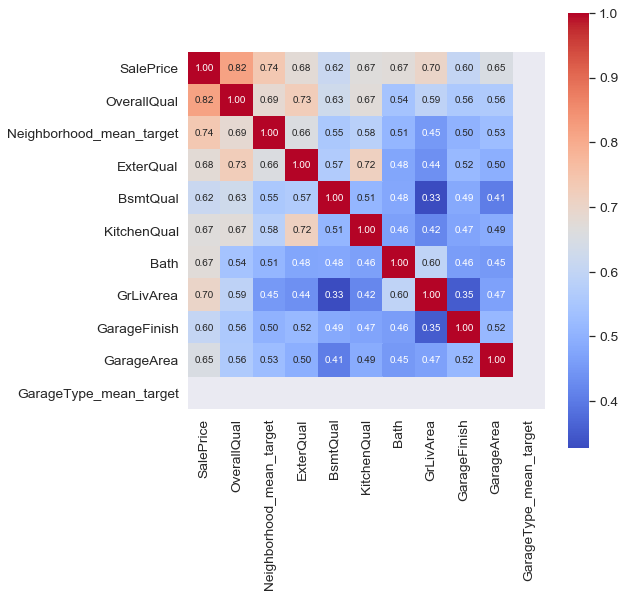

In [72]:
# Corr of features
corrmat = train.corr(method='kendall')
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index # top 11-1 features having the highest corr with y
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(8, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', cmap='coolwarm', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
# all >0.8 eliminated!

In [73]:
# looking for missing values
def missing_values(df):
    print("num_col:")
    for col in num_col:
        if df[col].isnull().sum()>0:
            print("    "+str(col)+": "+str(df[col].isnull().sum())+" "+str(df[col].isnull().sum()/df.shape[0]))
    print("ord_col:")
    for col in ord_col:
        if df[col].isnull().sum()>0:
            print("    "+str(col)+": "+str(df[col].isnull().sum())+" "+str(df[col].isnull().sum()/df.shape[0]))
    print("bin_cat_col:")
    for col in bin_cat_col:
        if df[col].isnull().sum()>0:
            print("    "+str(col)+": "+str(df[col].isnull().sum())+" "+str(df[col].isnull().sum()/df.shape[0]))
    print('multi_cat_col:')        
    for col in multi_cat_col:
        if df[col].isnull().sum()>0:
            print("    "+str(col)+": "+str(df[col].isnull().sum())+" "+str(df[col].isnull().sum()/df.shape[0]))

missing_values(train)
print('+++++++++++++++++++++++++++++++++++++')
missing_values(test)

num_col:
    LotFrontage: 259 0.1773972602739726
    MasVnrArea: 8 0.005479452054794521
    GarageType_mean_target: 81 0.05547945205479452
ord_col:
bin_cat_col:
multi_cat_col:
    MasVnrType: 8 0.005479452054794521
+++++++++++++++++++++++++++++++++++++
num_col:
    LotFrontage: 227 0.15558601782042494
    Exterior2nd_mean_target: 1 0.0006854009595613434
    MasVnrArea: 15 0.01028101439342015
    BsmtFinSF1: 1 0.0006854009595613434
    BsmtFinSF2: 1 0.0006854009595613434
    BsmtUnfSF: 1 0.0006854009595613434
    Bath: 2 0.0013708019191226869
    GarageType_mean_target: 76 0.0520904729266621
    GarageArea: 1 0.0006854009595613434
ord_col:
bin_cat_col:
multi_cat_col:
    MSZoning: 4 0.0027416038382453737
    Exterior1st: 1 0.0006854009595613434
    MasVnrType: 16 0.010966415352981495


In [74]:
for col in multi_cat_col:  # impute by mode 
    if train[col].isnull().sum()>0 or test[col].isnull().sum()>0:
        mode = train[col].value_counts().index[0]
        train[col].fillna(mode,inplace=True)
        test[col].fillna(mode,inplace=True)

for col in num_col:  # impute by median 
    if train[col].isnull().sum()>0 or test[col].isnull().sum()>0:
        median = train[col].median()
        train[col].fillna(median,inplace=True)
        test[col].fillna(median,inplace=True)

In [75]:
# looking for missing values, check again
missing_values(train)
print('+++++++++++++++++++++++++++++++++++++')
missing_values(test)

num_col:
ord_col:
bin_cat_col:
multi_cat_col:
+++++++++++++++++++++++++++++++++++++
num_col:
ord_col:
bin_cat_col:
multi_cat_col:


In [76]:
def find_outliers_tukey(feature):
    q1 = np.percentile(feature, 25)
    q3 = np.percentile(feature, 75)
    iqr = q3-q1
    upbound = q3+1.5*iqr
    downbound = q1 - 1.5*iqr
    outlier_indices = list(feature.index[(feature>upbound)|(feature<downbound)])
    outlier_values = list(feature[outlier_indices])
    return outlier_indices,outlier_values

# find outlier by 1.5IQR, then impute with median in train set
for col in num_col:
    outlier_indices_train,outlier_values_train = find_outliers_tukey(train[col])
    train.loc[outlier_indices_train,col]=train[col].median()
    outlier_indices_test,outlier_values_test = find_outliers_tukey(test[col])
    test.loc[outlier_indices_test,col]=train[col].median()

In [77]:
pos_num_col=[] # choose features whose data all >= 0, then do skewness test, log1p
for col in num_col:
    if (train[train[col]<0].shape[0])==0 and (test[test[col]<0].shape[0])==0:
        pos_num_col.append(col)
print(pos_num_col)
print(num_col)

['MSSubClass_mean_target', 'LotFrontage', 'LotArea', 'Neighborhood_mean_target', 'Condition1_mean_target', 'Condition2_mean_target', 'AgeBuilt', 'AgeRemodAdd', 'RoofMatl_mean_target', 'Exterior2nd_mean_target', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea', 'Bath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType_mean_target', 'GarageAgeBlt', 'GarageArea', 'FiveArea']
['MSSubClass_mean_target', 'LotFrontage', 'LotArea', 'Neighborhood_mean_target', 'Condition1_mean_target', 'Condition2_mean_target', 'AgeBuilt', 'AgeRemodAdd', 'RoofMatl_mean_target', 'Exterior2nd_mean_target', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea', 'Bath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType_mean_target', 'GarageAgeBlt', 'GarageArea', 'FiveArea']


In [78]:
for col in pos_num_col:
    if abs(train[col].skew()) > 0.5  and abs(np.log1p(train[col]).skew())<abs(train[col].skew()):
        print("Skewness for "+str(col)+": " + str(train[col].skew()))
        train[col] = np.log1p(train[col])
        test[col] = np.log1p(test[col])
        print("Skewness for "+str(col)+": " + str(train[col].skew()))

Skewness for AgeRemodAdd: 0.5035620027004843
Skewness for AgeRemodAdd: -0.3141818014149802
Skewness for MasVnrArea: 1.547163075851295
Skewness for MasVnrArea: 0.7712166989144196
Skewness for BsmtFinSF1: 0.6888884892219916
Skewness for BsmtFinSF1: -0.621796943698809
Skewness for Bath: 0.6445717759178284
Skewness for Bath: 0.3485777363069534
Skewness for Fireplaces: 0.5435174999880907
Skewness for Fireplaces: 0.15206194915851154
Skewness for GarageAgeBlt: 0.6683937940441372
Skewness for GarageAgeBlt: -0.6017251631081343


In [79]:
col_overview()

num_col: 
['MSSubClass_mean_target', 'LotFrontage', 'LotArea', 'Neighborhood_mean_target', 'Condition1_mean_target', 'Condition2_mean_target', 'AgeBuilt', 'AgeRemodAdd', 'RoofMatl_mean_target', 'Exterior2nd_mean_target', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea', 'Bath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType_mean_target', 'GarageAgeBlt', 'GarageArea', 'FiveArea']
multi_cat_col
['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
ord_col
['LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual']
bin_cat_col
['Street', 'CentralAir', 'LowQualFinSF', 'PoolArea', 'NewHouse?']


In [80]:
# encode bin categorical features
train_bin = train[bin_cat_col]
test_bin = test[bin_cat_col]
for col in bin_cat_col:
    le = LabelEncoder()
    train_bin[col] = le.fit_transform(train_bin[col])
    test_bin[col] = le.transform(test_bin[col])

# encode multi categorical features
train_multi = train[multi_cat_col]
test_multi = test[multi_cat_col]
len_train_multi = len(train_multi)
train_test_multi = pd.concat([train_multi, test_multi],axis=0)
train_test_ohe = pd.get_dummies(train_test_multi)  # drop_first = True if you want drop one col for each feature
train_ohe, test_ohe = train_test_ohe.iloc[:len_train_multi, :], train_test_ohe.iloc[len_train_multi:, :]    

# scaling numerical features
ss = StandardScaler()
train_num = ss.fit_transform(train[num_col])
train_num = pd.DataFrame(train_num,columns=num_col)
test_num = ss.transform(test[num_col])
test_num = pd.DataFrame(test_num,columns=num_col)

# scaling ordinal features
ss2 = StandardScaler()
train_ord = ss2.fit_transform(train[ord_col])
train_ord = pd.DataFrame(train_ord,columns=ord_col)
test_ord = ss2.transform(test[ord_col])
test_ord = pd.DataFrame(test_ord,columns=ord_col)

/Users/FY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/FY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [81]:
train_ohe.shape,test_ohe.shape

((1460, 117), (1459, 117))

In [82]:
new_train = pd.concat([train_bin,train_ohe,train_num,train_ord],axis=1)
new_test = pd.concat([test_bin,test_ohe,test_num,test_ord],axis=1)
new_train.shape,new_test.shape

((1460, 159), (1459, 159))

In [83]:
new_train_col=new_train.columns.to_list()
new_test_col=new_test.columns.to_list()
print(new_train_col==new_test_col) 

True


In [84]:
new_train.to_csv('../data/featured_data/featured_train.csv',index=False)
new_test.to_csv('../data/featured_data/featured_test.csv',index=False)

In [85]:
X_train = new_train
y_train = train['SalePrice']
X_test = new_test

In [86]:
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_train)
joblib.dump(pca, '../models/pca.m') # save pca model as pca.m

['../models/pca.m']

In [87]:
X_train_pca.shape,X_test_pca.shape

((1460, 74), (1460, 74))

In [88]:
pd.DataFrame(X_train_pca).to_csv('../data/featured_data/X_train.csv',index=False)
pd.DataFrame(X_test_pca).to_csv('../data/featured_data/X_test.csv',index=False)
pd.DataFrame(y_train).to_csv('../data/featured_data/y_train.csv',index=False)